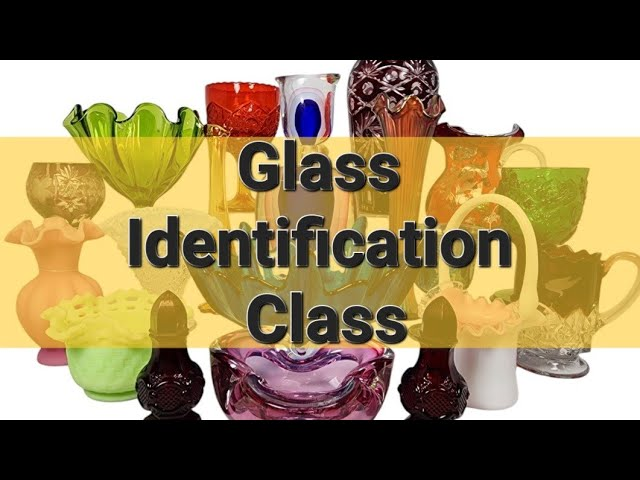

# Q.1

# Glass Identificatin

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets

import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

import warnings
warnings.filterwarnings('ignore')

In [20]:
data1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header =None)

In [21]:
data1.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Exploring Data

In [23]:
data1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [25]:
data1.shape

(214, 11)

In [27]:
data1[10].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [28]:
data1.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

<AxesSubplot:xlabel='10', ylabel='count'>

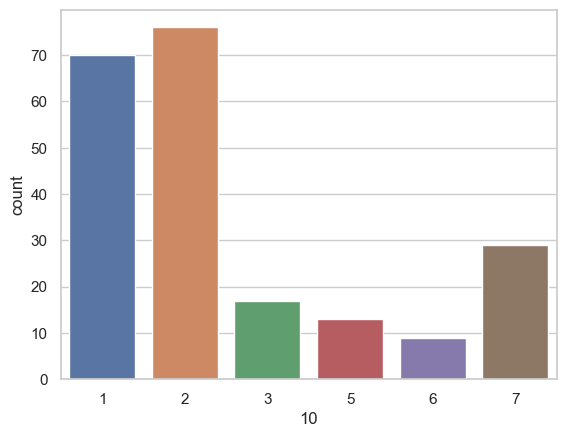

In [32]:
data1[10].value_counts()
    
    
sns.countplot(x=10, data=data1)

# Data processing

Adding meaningful column/attribute names

In [35]:
names = ['ID','Ri','Na','mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data1.columns = names
data1.head()

,ID,Ri,Na,mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [37]:
#remove unnecessary columns
data1 = data1.drop('ID',1)

In [40]:
data1.head()

,Ri,Na,mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# statistics of Dataset

In [41]:
data1.describe()

,Ri,Na,mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Data Visualization

1. Using univariate plots

In [42]:
features = ['Ri','Na','mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

x = data1[features]
y = data1[label]

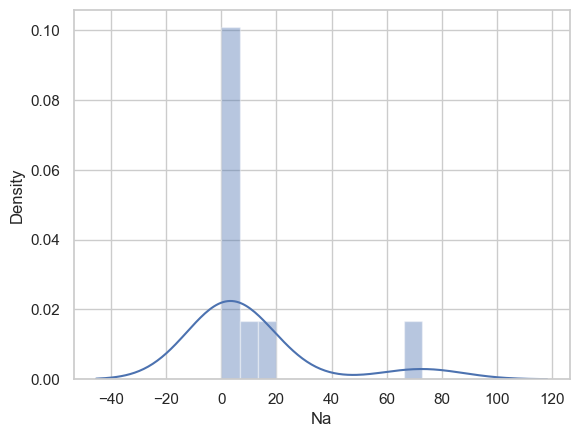

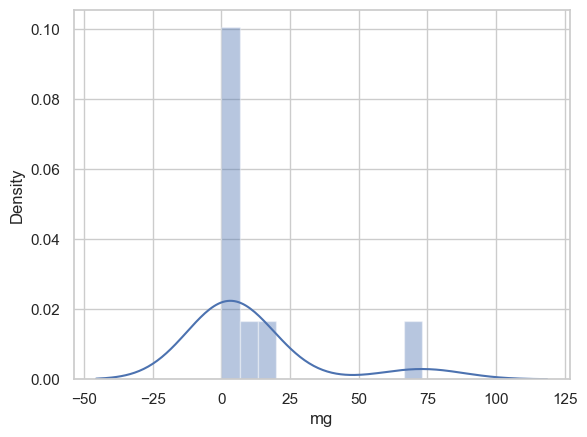

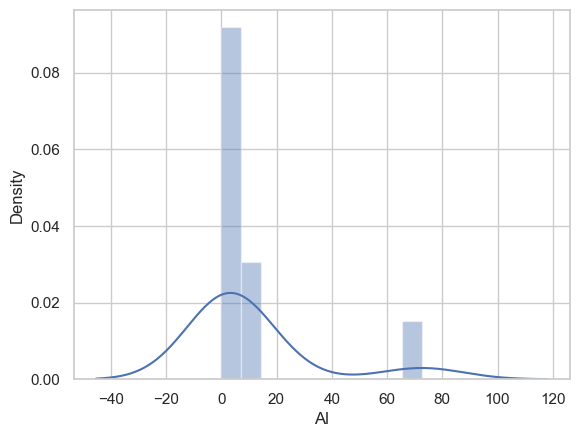

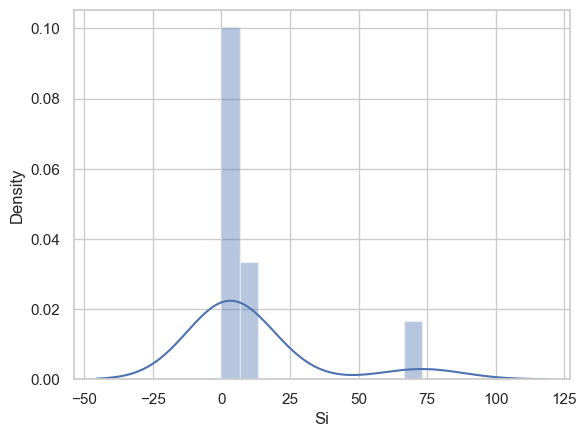

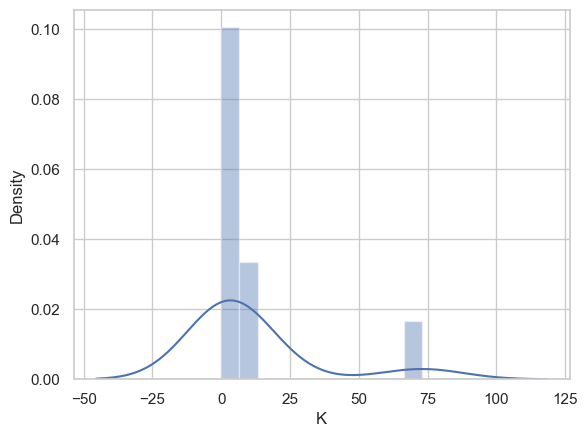

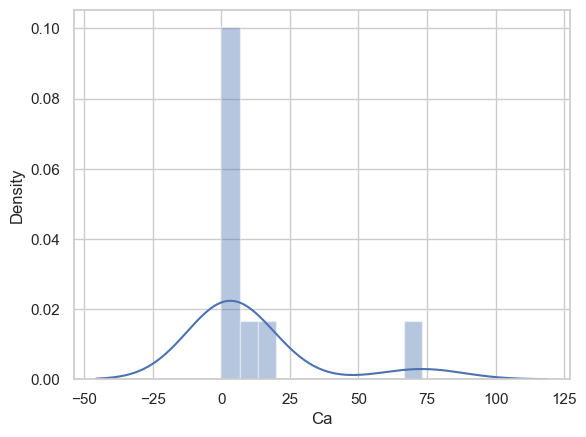

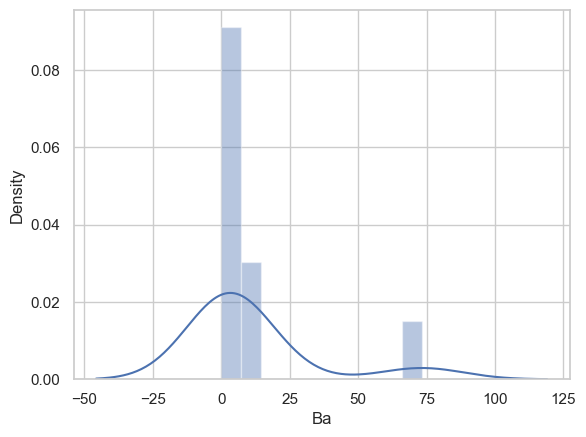

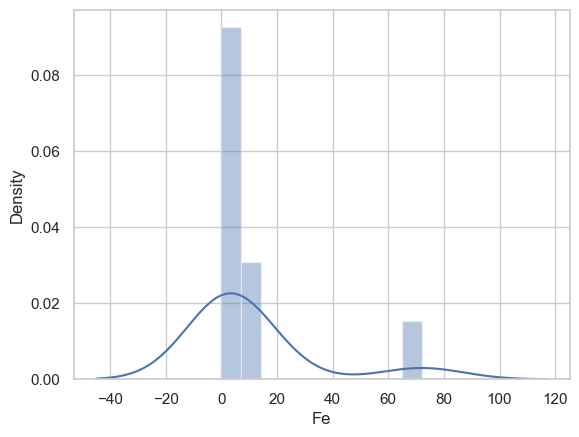

In [46]:
x2 = x.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

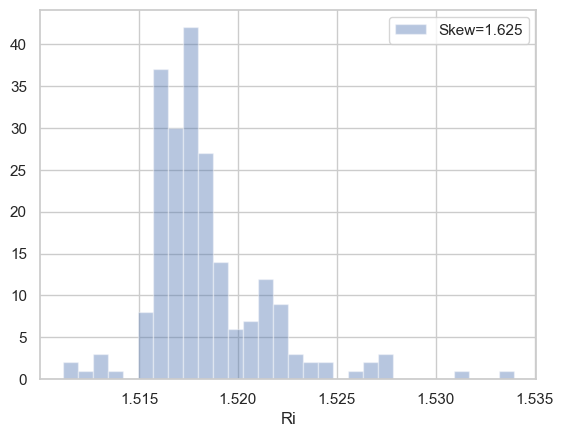

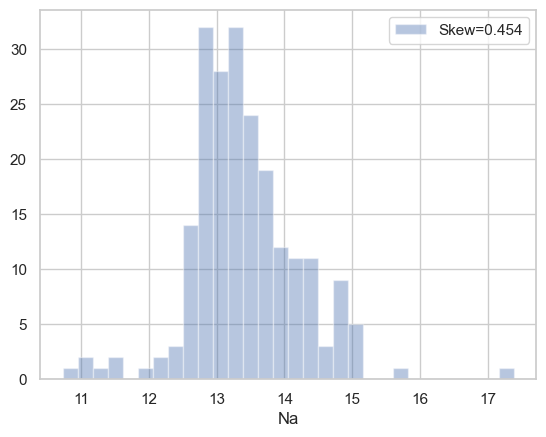

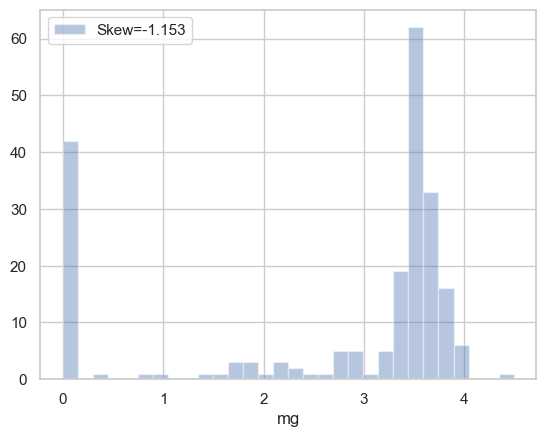

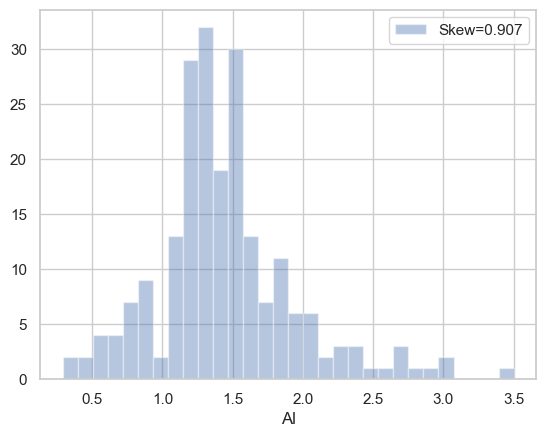

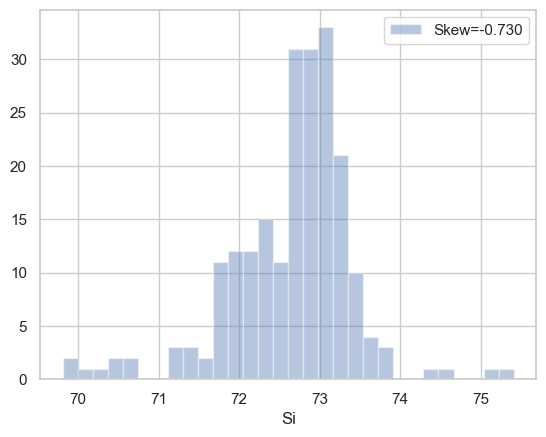

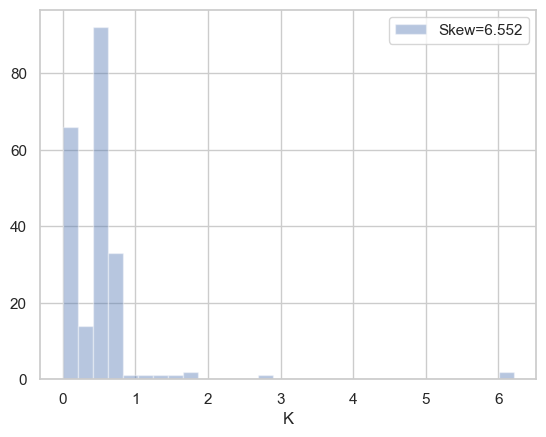

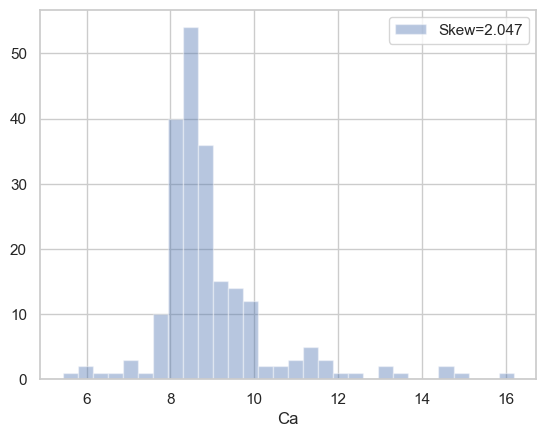

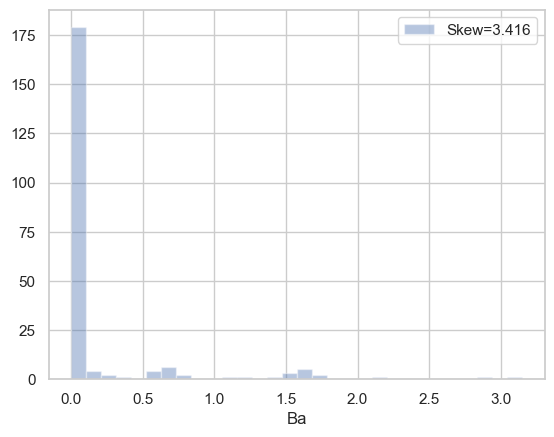

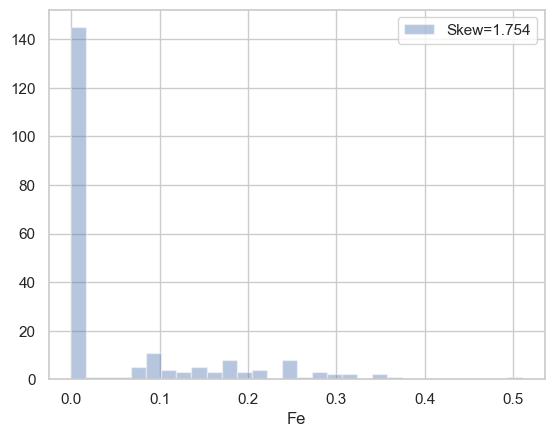

In [49]:
for feat in features:
    skew = data1[feat].skew()
    sns.distplot(data1[feat],kde = False, label='Skew=%.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

# Using Multivariate Plots

<Figure size 800x800 with 0 Axes>

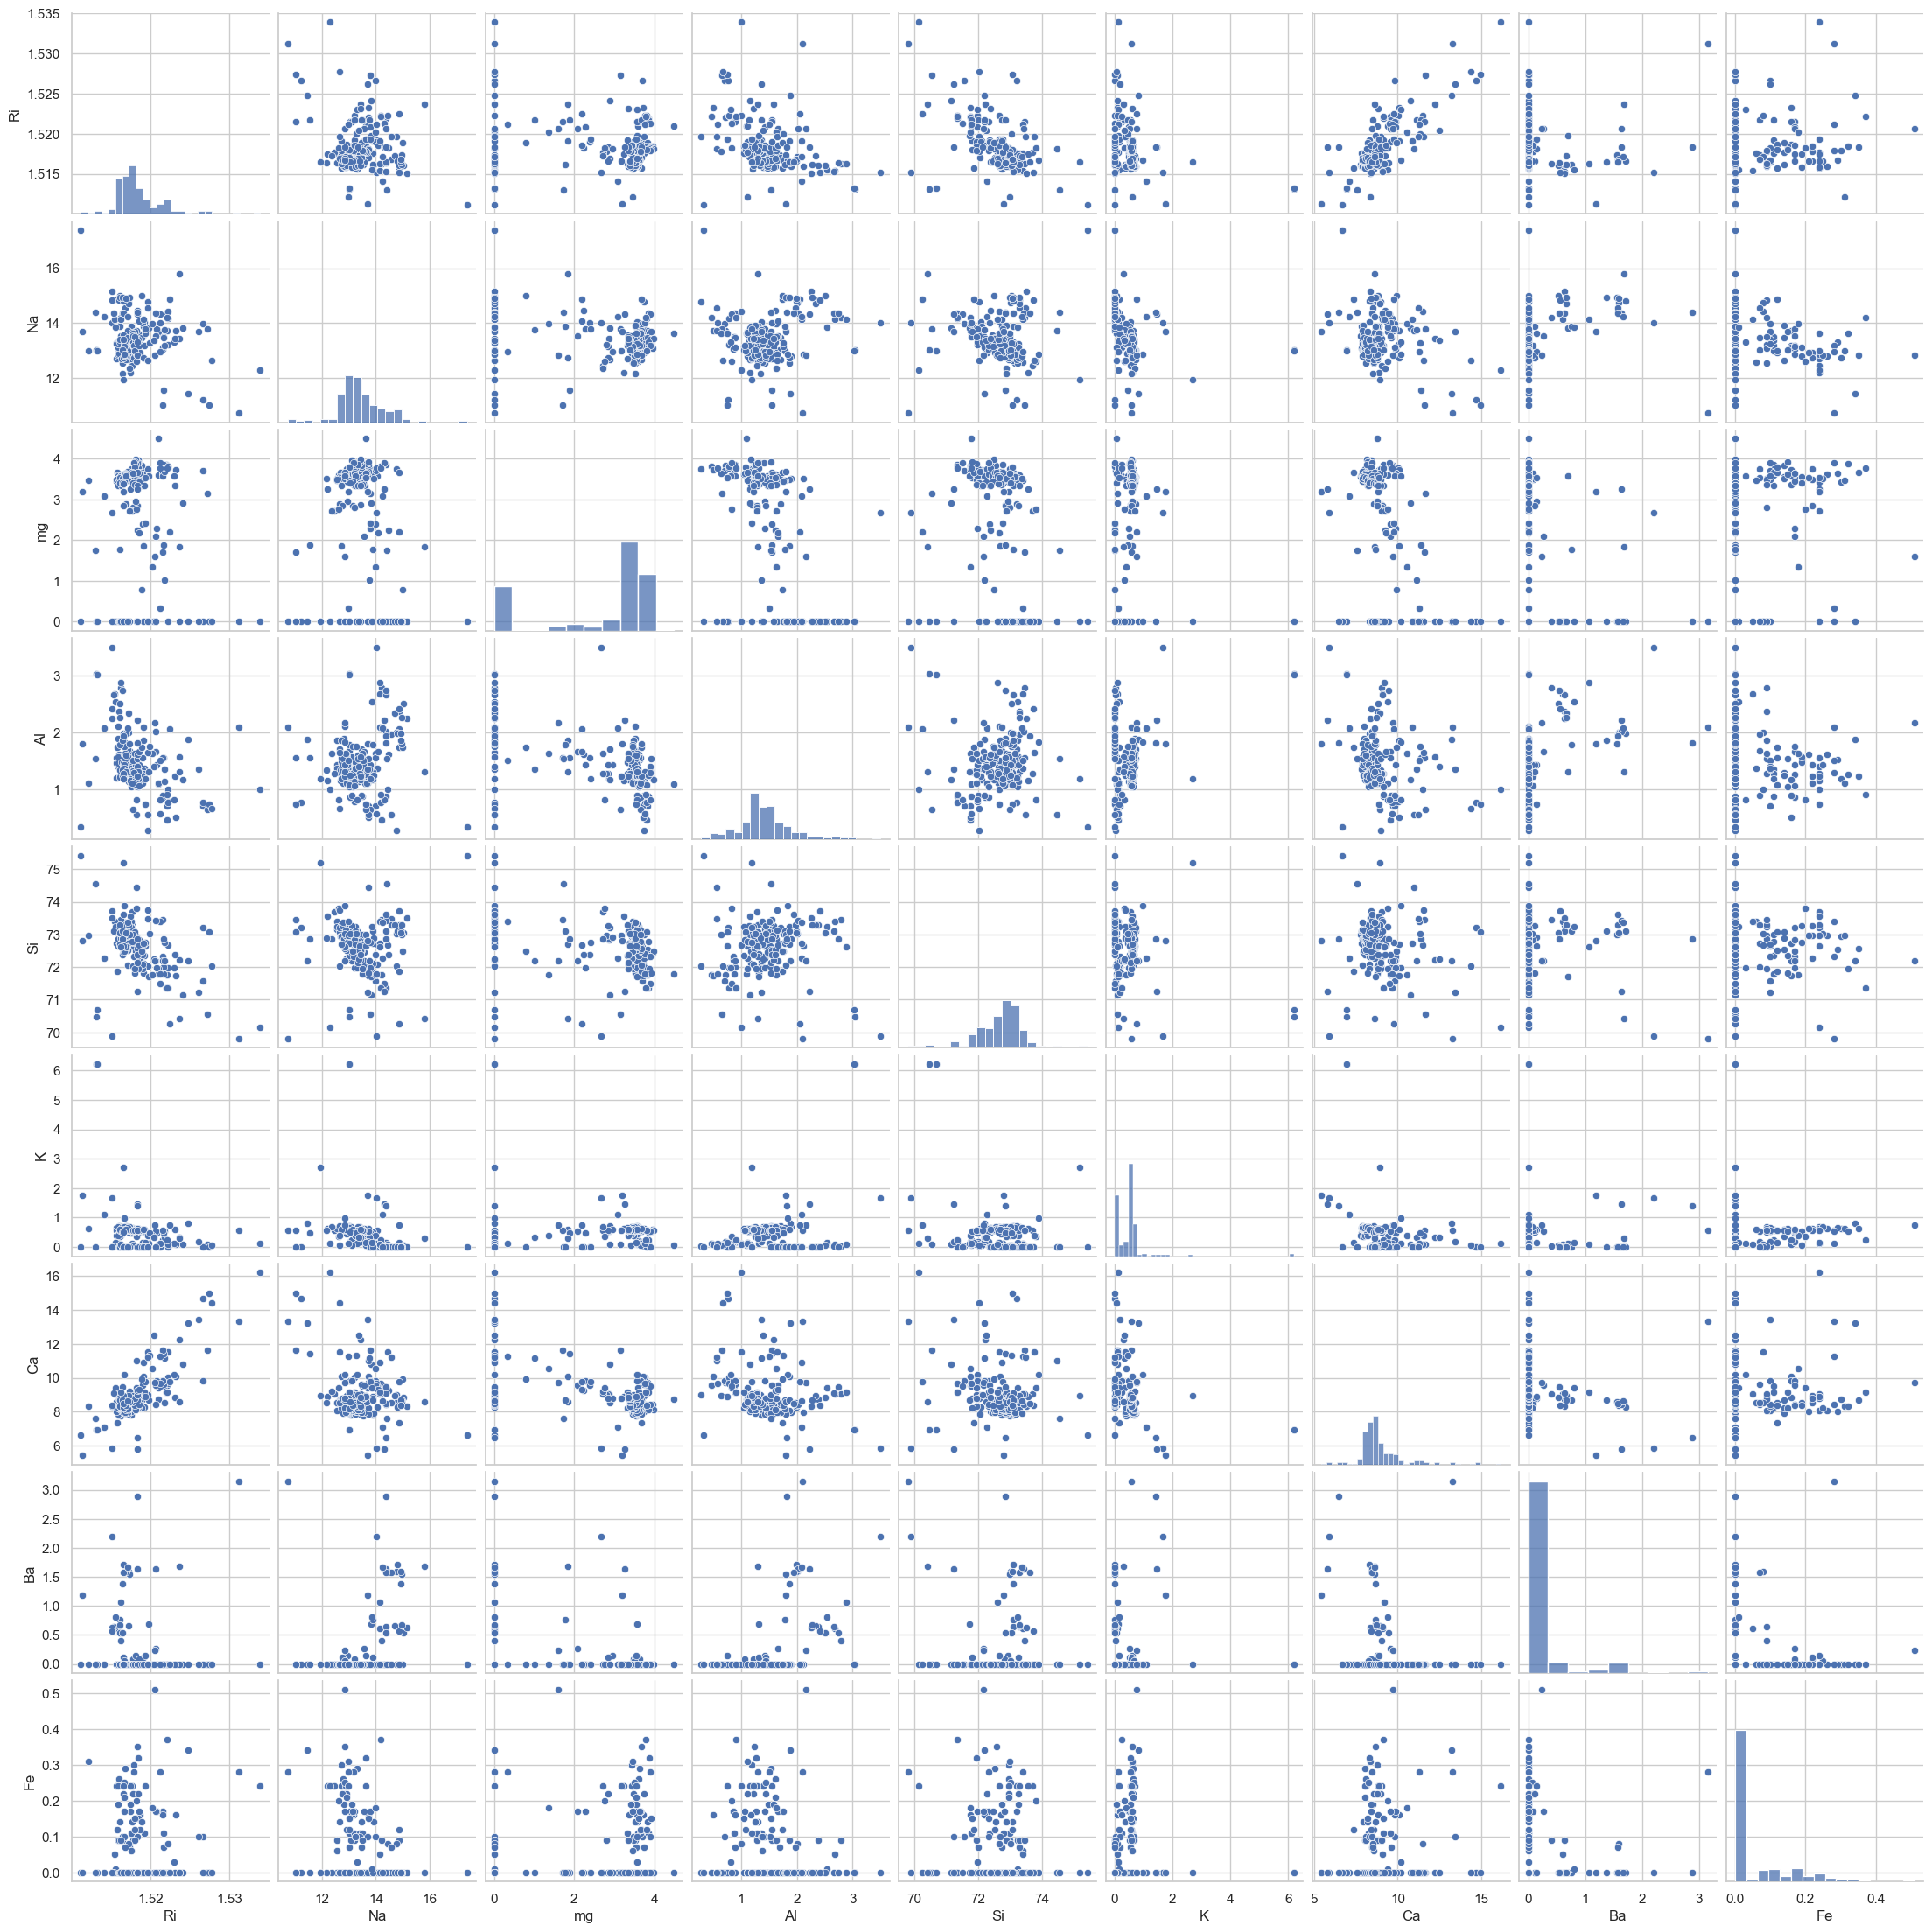

In [55]:
x2 = pd.DataFrame(x)

plt.figure(figsize=(8,8))
sns.pairplot(data = x2)
plt.show()

# Using Correlation Matrix

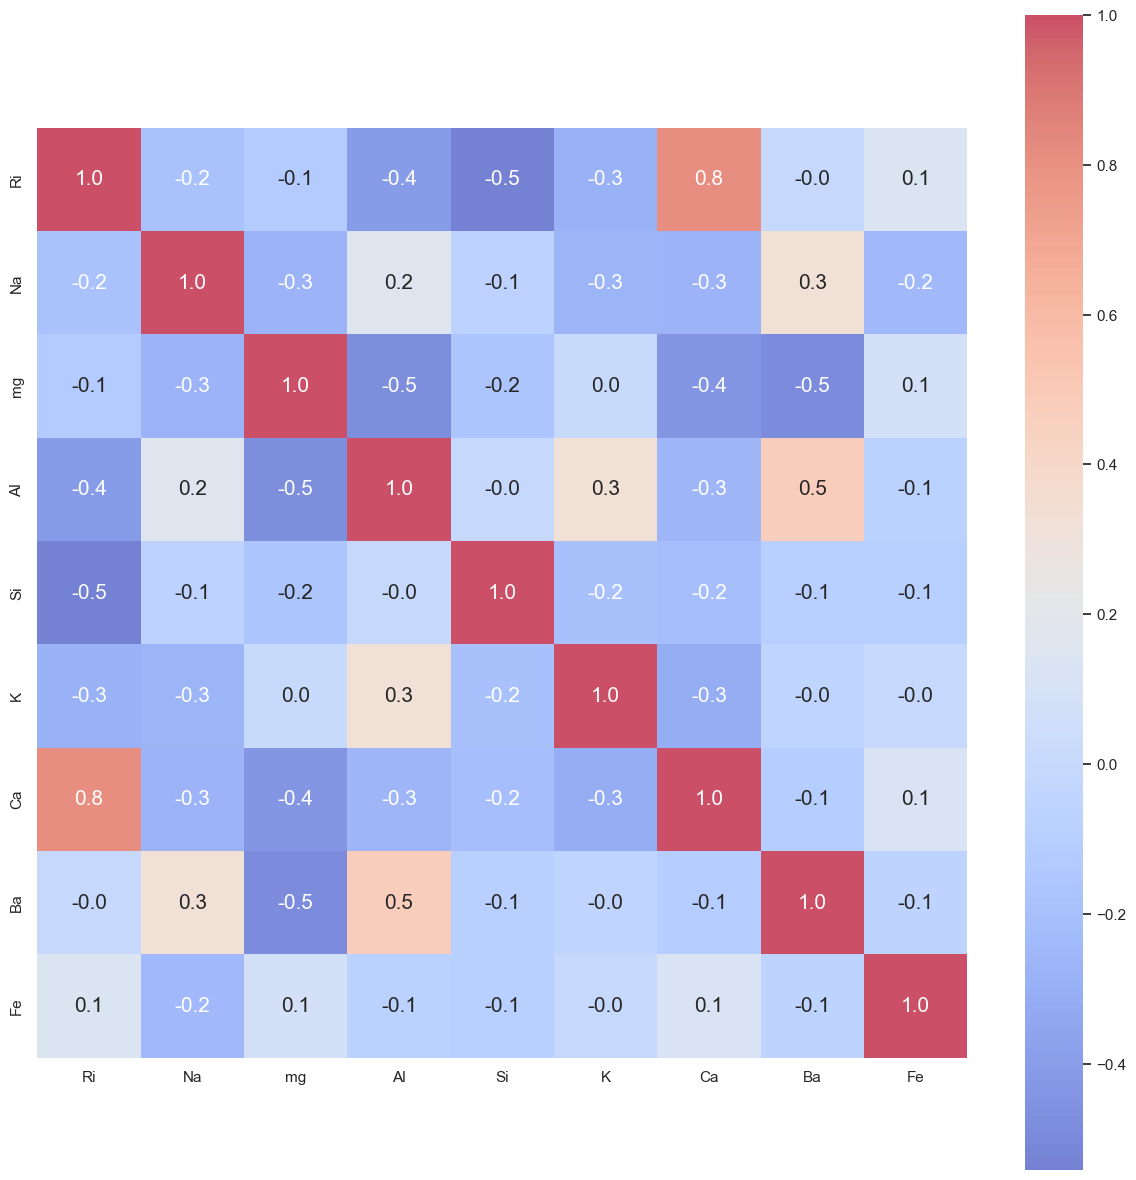

In [62]:
correlation = x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True,square =True, annot=True, fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

# Outlier Detection

In [67]:
#Detect observation with more than one outlier

def outlier_hunt(data1):
    outlier_indices = []
    
    for col in data1.columns.tolist():
        
        Q1 = np.percentile(data1[col],25)
        
        Q3 = np.percentile(data1[col],75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR
        
        outlier_list_col = data1[(data1[col]< Q1 - outlier_step) | (data1[col] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter (outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data1[features]))))

The dataset contains 14 observations with more than 2 outliers


# Data Treatment

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ri          214 non-null    float64
 1   Na          214 non-null    float64
 2   mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 1.Removing Outliers

In [71]:
outlier_indices = outlier_hunt(data1[features])
df = data1.drop(outlier_indices).reset_index(drop=True)

print(data1.shape)

(214, 10)


# 2. Normalizing the data

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
x.head()

,Ri,Na,mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [74]:
y.head()

,glass_type
0,1
1,1
2,1
3,1
4,1


# 3.Scaling The Features

In [75]:
from sklearn import preprocessing
x = preprocessing.scale(x)

# Visualization of Data after Being Preprocessed

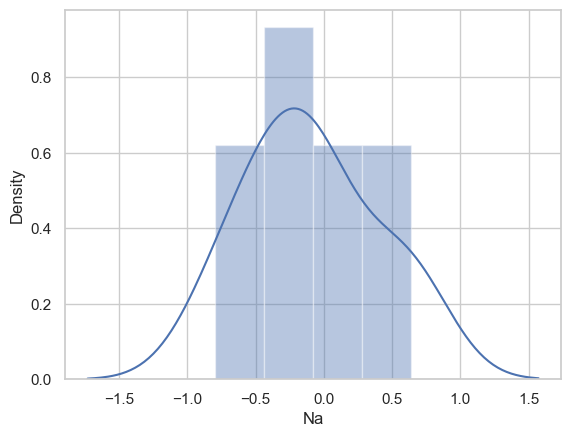

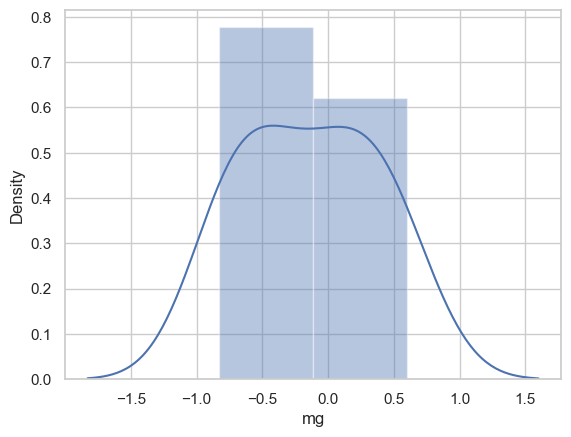

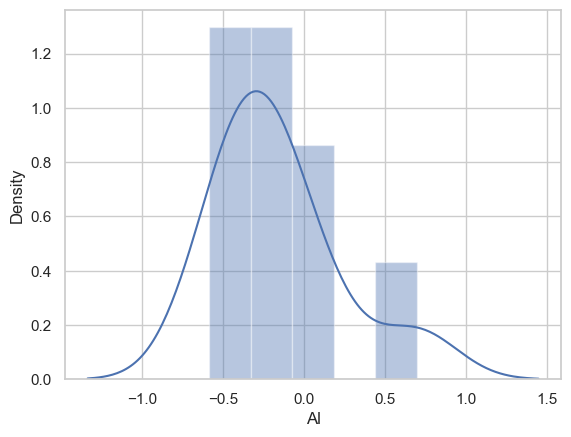

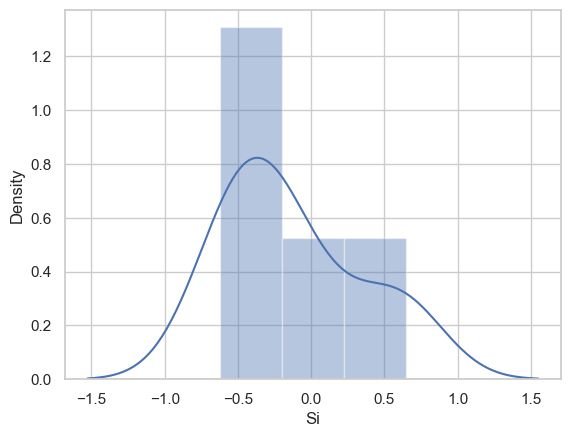

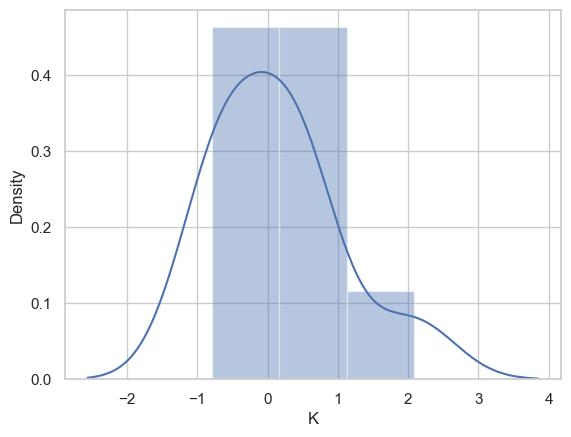

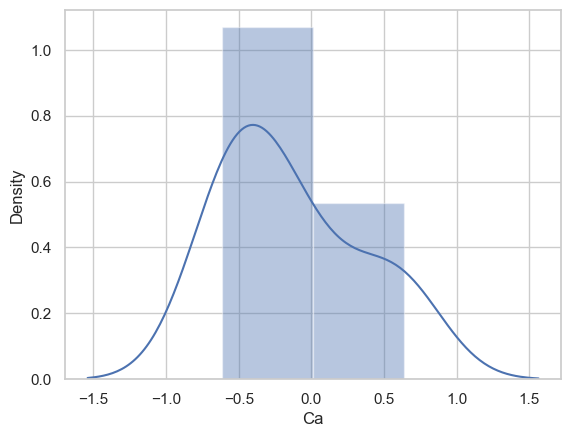

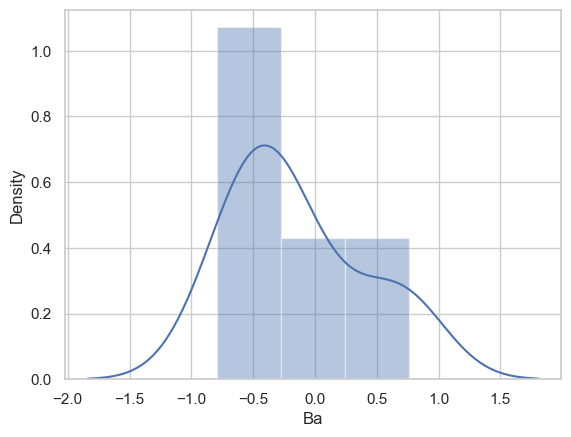

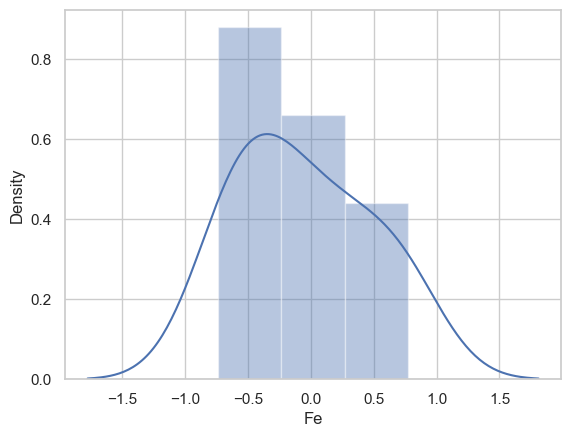

In [76]:
x2 = x 

for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

# Training set- Test set Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state=0, stratify = y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (107, 9)
Shape of X_test = (107, 9)
Shape of y_train = (107,)
Shape of y_test = (107,)


# Training Different Machine Learning Models

# 1

 K-Nearest Neighbors

In [80]:
Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)
    
print(knn.score(X_train, y_train))
print(Score)

0.6728971962616822
[]


# 2

 Decision Tree

In [81]:
Scores = []

for i in range(i):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    Scores.append(score)
    
print(tree.score(X_train, y_train))
print(Scores)
    

1.0
[0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289, 0.6915887850467289]


# 3

Logistic Regression

In [82]:
Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.6822429906542056
[0.5887850467289719]


# 4

 SVM Classifier (Non-Linear)

In [83]:

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7570093457943925
[0.6822429906542056]
